In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import re

intl_mat = pd.read_csv('results.csv')
teams_18 = pd.read_csv('fixtures_russia_2018.csv')
teams_18 = list(teams_18['HomeTeam'].unique())
teams_18 = teams_18[:32]
relevant_years = [1998,2002,2006,2010,2014]

In [2]:
wc = pd.read_csv('WorldCupMatches.csv')
wc.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [3]:
wc_teams_98 = list(wc[wc['Year']==1998]['Home Team Name'].unique())
wc_teams_02 = list(wc[wc['Year']==2002]['Home Team Name'].unique())
wc_teams_06 = list(wc[wc['Year']==2006]['Home Team Name'].unique())
wc_teams_10 = list(wc[wc['Year']==2010]['Home Team Name'].unique())
wc_teams_14 = list(wc[wc['Year']==2014]['Home Team Name'].unique())

In [4]:
wc_teams_98 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia') for s in wc_teams_98]
wc_teams_02 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia') for s in wc_teams_02]
wc_teams_06 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia') for s in wc_teams_06]
wc_teams_10 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia') for s in wc_teams_10]
wc_teams_14 = [s.replace('IR Iran','Iran').replace("C�te d'Ivoire",'Ivory Coast').replace('rn">Bosnia and Herzegovina', 'Bosnia-Herzegovina').replace('rn">Serbia and Montenegro','Serbia').replace('rn">Trinidad and Tobago','Trinidad and Tobago').replace('rn">Republic of Ireland','Ireland').replace('China PR','China').replace('Yugoslavia','Serbia') for s in wc_teams_14]


#wc_teams_14[7] = 'Ivory Coast'
#wc_teams_14[12] = 'Iran'
#wc_teams_14[-4] = 'Bosnia-Herzegovina'

In [5]:
def home_away(row,team):
    if row['home_team'] == team:
        return 'H'
    elif row['away_team'] == team:
        return 'A'
def opponent(row,team,teams):
    if row['home_team'] == team:
        return 'y' if row['away_team'] in teams else 'n'
    else:
        return 'y' if row['home_team'] in teams else 'n'
def win_lose(row):
    if row['H_A'] == 'H':
        return 'W' if int(row['home_score'])>int(row['away_score']) else 'L'
    else:
        return 'W' if int(row['home_score'])<int(row['away_score']) else 'L'

def agg(row):
    if row['H_A'] == 'H':
        return int(row['home_score'])-int(row['away_score'])
    else:
        return int(row['away_score'])-int(row['home_score'])
def goals_for(row):
    if row['H_A'] == 'H':
        return int(row['home_score'])
    else:
        return int(row['away_score']) 
def goals_against(row):
    if row['H_A'] == 'H':
        return int(row['away_score'])
    else:
        return int(row['home_score'])
def all_teams(teams,wc_teams):
    if all(elem in teams for elem in wc_teams):
        return 'True'

In [6]:
matches98 = intl_mat[(intl_mat['date']>'1994-07-17')&(intl_mat['date']<'1998-06-10')].reset_index(drop = True)
teams98 = list(dict(matches98['home_team'].value_counts()).keys())
matches02 = intl_mat[(intl_mat['date']>'1998-07-12')&(intl_mat['date']<'2002-05-31')].reset_index(drop = True)
teams02 = list(dict(matches02['home_team'].value_counts()).keys())
matches06 = intl_mat[(intl_mat['date']>'2002-06-30')&(intl_mat['date']<'2006-06-09')].reset_index(drop = True)
teams06 = list(matches06['home_team'].unique())
matches10 = intl_mat[(intl_mat['date']>'2006-07-09')&(intl_mat['date']<'2010-06-11')].reset_index(drop = True)
teams10 = list(dict(matches10['home_team'].value_counts()).keys())
matches14 = intl_mat[(intl_mat['date']>'2010-07-11')&(intl_mat['date']<'2014-06-12')].reset_index(drop = True)
teams14 = list(dict(matches14['home_team'].value_counts()).keys())
matches18 = intl_mat[(intl_mat['date']>'2014-07-13')].reset_index(drop = True)

In [7]:
teams_18 = pd.read_csv('fixtures_russia_2018.csv')
teams_18 = list(teams_18['HomeTeam'].unique())
teams_18 = teams_18[:32]
teams_18[17] = 'Iran'

In [8]:
print(all_teams(teams14,wc_teams_14))
print(all_teams(teams10,wc_teams_10))
print(all_teams(teams06,wc_teams_06))
print(all_teams(teams02,wc_teams_02))
print(all_teams(teams98,wc_teams_98))


True
True
True
True
True


In [9]:
def results(year,wc_teams):
    position_list = {}
    wc_14 = wc[wc['Year']==year].drop(['Stadium','Attendance','Half-time Home Goals','Half-time Away Goals','Referee','Assistant 1','Assistant 2','RoundID','MatchID','Home Team Initials','Away Team Initials'],axis=1)
    wc_14[wc_14['Stage']=='Round of 16'].drop_duplicates()
    final = wc_14[wc_14['Stage']=='Final'].drop_duplicates()
    semi_fin = wc_14[wc_14['Stage']=='Semi-finals']
    qtr_fin = wc_14[wc_14['Stage']=='Quarter-finals'].drop_duplicates()
    rnd_16 = wc_14[wc_14['Stage']=='Round of 16'].drop_duplicates()
    if int(final['Home Team Goals'])!=int(final['Away Team Goals']):
        if int(final['Home Team Goals'])>int(final['Away Team Goals']):
            position_list[str(final['Home Team Name'].iloc[0])] = 'Winner'
            position_list[str(final['Away Team Name'].iloc[0])] = '2nd'
        else:
            position_list[str(final['Home Team Name'].iloc[0])] = '2nd'
            position_list[str(final['Away Team Name'].iloc[0])] = 'Winner'
    else:
        win = re.compile(r'(?P<winner>[a-zA-Z]+) win.+')
        t = win.match(str(final['Win conditions'].iloc[0]))
        if final['Home Team Name'].iloc[0] == t.group('winner'):
            position_list[final['Home Team Name'].iloc[0]] = 'Winner'
            position_list[final['Away Team Name'].iloc[0]]='2nd'
        else:
            position_list[final['Home Team Name'].iloc[0]]='2nd'
            position_list[final['Away Team Name'].iloc[0]]='Winner'
    hme_semi = list(semi_fin['Home Team Name'].unique())
    away_semi = list(semi_fin['Away Team Name'].unique())
    for elem in hme_semi:
        if elem not in list(position_list.keys()):
            position_list[elem]='Semis'
    for elem in away_semi:
        if elem not in list(position_list.keys()):
            position_list[elem]='Semis'
    hme_qtr = list(qtr_fin['Home Team Name'].unique())
    away_qtr = list(qtr_fin['Away Team Name'].unique())
    for elem in hme_qtr:
        if elem not in list(position_list.keys()):
            position_list[elem]='Qtrs'
    for elem in away_qtr:
        if elem not in list(position_list.keys()):
            position_list[elem]='Qtrs'
    hme_16 = list(rnd_16['Home Team Name'].unique())
    away_16 = list(rnd_16['Away Team Name'].unique())
    for elem in hme_16:
        if elem not in list(position_list.keys()):
            position_list[elem]='16'
    for elem in away_16:
        if elem not in list(position_list.keys()):
            position_list[elem]='16'
    for elem in wc_teams:
        if elem not in list(position_list.keys()):
            position_list[elem]='Group'
    return position_list

In [10]:
dic_98 = results(1998,wc_teams_98)
dic_02 = results(2002,wc_teams_02)
dic_06 = results(2006,wc_teams_06)
dic_10 = results(2010,wc_teams_10)
dic_14 = results(2014,wc_teams_14)

In [11]:
def grouping(wc_teams,matches,year,results):
    dic = {}
    count=0
    for elem in wc_teams:
        print(elem)
        count+=1
        country = pd.merge(matches[matches['away_team']==elem],matches[matches['home_team']==elem],how='outer').sort_values('date').reset_index(drop=True)
        country['H_A'] = country.apply(lambda x: home_away(x,elem),axis=1)
        country['opponent'] = country.apply(lambda x: opponent(x,elem,wc_teams),axis=1)
        country['result'] = country.apply(lambda x: win_lose(x),axis=1)
        country['score'] = country.apply(lambda x: agg(x),axis=1)
        country['gF'] = country.apply(lambda x: goals_for(x),axis=1)
        country['gA'] = country.apply(lambda x: goals_against(x),axis=1)
        wrat_fr = country[country['tournament']=='Friendly']['result'].value_counts()['W']/country[country['tournament']=='Friendly'].shape[0]
        try:
            wrat_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['result'].value_counts()['W']/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
        except:
            wrat_other = 0
        agg_score_fr = country[country['tournament']=='Friendly']['score'].sum(axis=0)
        agg_score_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['score'].sum(axis=0)
        if (elem != 'Brazil' and year==2014)or (elem != 'South Africa' and year==2010) or (elem != 'Germany' and year==2006) or (elem != 'France' and year==2002) or (elem != 'Brazil' and year==1998):
            try:
                gF_wc =country[country['tournament']=='FIFA World Cup qualification']['gF'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                gA_wc =country[country['tournament']=='FIFA World Cup qualification']['gA'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                wrat_wc = country[country['tournament']=='FIFA World Cup qualification']['result'].value_counts()['W']/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                form = country.tail()['result'].value_counts()['W']
                agg_score_wc = country[country['tournament']=='FIFA World Cup qualification']['score'].sum(axis=0)
            except:
                gF_wc = 0
                gA_wc = 0
                wrat_wc = 0
                agg_score_wc = 0
                form = 0
        elif (elem == 'Brazil' and year==2014) or (elem == 'South Africa' and year==2010) or (elem == 'Germany' and year==2006)  or (elem == 'France' and year==2002)or (elem == 'Brazil' and year==1998):
            gF_wc = 0
            try:
                form = country.tail()['result'].value_counts()['W']
            except:
                form=0
            gA_wc = 0 
            wrat_wc = 0
            agg_score_wc = 0
        gF_fr =country[country['tournament']=='Friendly']['gF'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
        gA_fr =country[country['tournament']=='Friendly']['gA'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
        gF_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gF'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
        gA_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gA'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
        country = country.drop(['home_team','away_team','home_score','away_score','city','country','neutral'],axis=1)
        dic['%s - %s'%(elem,year)] = [wrat_fr,wrat_other,wrat_wc,gA_fr,gA_other,gA_wc,gF_fr,gF_other,gF_wc,agg_score_fr,agg_score_other,agg_score_wc,form,results[elem]]
    return dic

In [12]:
series_98 = grouping(wc_teams_98,matches98,1998,dic_98)
series_02 = grouping(wc_teams_02,matches02,2002,dic_02)
series_06 = grouping(wc_teams_06,matches06,2006,dic_06)
series_10 = grouping(wc_teams_10,matches10,2010,dic_10)
series_14 = grouping(wc_teams_14,matches14,2014,dic_14)

Brazil
Morocco
Italy
Cameroon
Paraguay
Saudi Arabia
France
Spain
Korea Republic
Netherlands
Argentina
Serbia
Jamaica
England
Romania
Germany
Scotland
Chile
South Africa
Nigeria
Japan
Belgium
USA
Colombia
France
Uruguay
Ireland
Germany
Argentina
Paraguay
England
Spain
Brazil
Italy
Croatia
China
Japan
Korea Republic
Russia
USA
Denmark
Cameroon
Sweden
South Africa
Costa Rica
Mexico
Portugal
Tunisia
Senegal
Saudi Arabia
Nigeria
Slovenia
Turkey
Ecuador
Poland
Belgium
Germany
Poland
England
Trinidad and Tobago
Argentina
Serbia
Mexico
Angola
Australia
USA
Italy
Korea Republic
France
Brazil
Spain
Tunisia
Ecuador
Sweden
Netherlands
Portugal
Czech Republic
Japan
Togo
Saudi Arabia
Costa Rica
Paraguay
Iran
Ivory Coast
Ghana
Croatia
Ukraine
Switzerland
South Africa
Uruguay
Korea Republic
Argentina
England
Algeria
Serbia
Germany
Netherlands
Japan
Italy
New Zealand
Ivory Coast
Brazil
Honduras
Spain
Greece
France
Slovenia
Ghana
Cameroon
Slovakia
Portugal
Chile
Mexico
Nigeria
USA
Australia
Paraguay
Den

In [13]:
df_98 = pd.DataFrame.from_dict(series_98,orient='index')
df_02 = pd.DataFrame.from_dict(series_02,orient='index')
df_06 = pd.DataFrame.from_dict(series_06,orient='index')
df_10 = pd.DataFrame.from_dict(series_10,orient='index')
df_14 = pd.DataFrame.from_dict(series_14,orient='index')

In [14]:
final_df = pd.concat([df_98,df_02,df_06,df_10,df_14])

In [15]:
final_df = final_df.rename(columns = {0:'Frie_winrat', 1:'other_winrat', 2:'Wcup_winrat',3:'goals_ag_fr', 4:'goals_ag_other', 5:'goals_ag_wcup',6:'goals_for_friend', 7:'goals_for_other', 8:'goals_for_wcup',9:'agg_score_friend', 10:'agg_score_other', 11:'agg_score_wcup',12:'Form',13:'Wcup_finish'})

In [16]:
final_df

,Frie_winrat,other_winrat,Wcup_winrat,goals_ag_fr,goals_ag_other,goals_ag_wcup,goals_for_friend,goals_for_other,goals_for_wcup,agg_score_friend,agg_score_other,agg_score_wcup,Form,Wcup_finish
Brazil - 1998,0.843750,0.689655,0.000000,0.812500,0.586207,0.000000,2.656250,2.310345,0.000000,59,50,0,3,2nd
Morocco - 1998,0.666667,0.473684,0.000000,0.533333,0.789474,0.000000,2.400000,1.421053,0.000000,28,12,0,0,Group
Italy - 1998,0.600000,0.500000,0.600000,0.900000,1.000000,0.200000,1.700000,1.750000,1.300000,8,12,11,3,Qtrs
Cameroon - 1998,0.333333,0.363636,0.666667,1.375000,1.272727,0.666667,0.958333,1.363636,1.666667,-10,2,6,3,Group
Paraguay - 1998,0.450000,0.250000,0.000000,1.350000,1.083333,0.000000,1.550000,0.833333,0.000000,4,-3,0,0,16
Saudi Arabia - 1998,0.441176,0.560000,0.615385,1.264706,1.120000,0.538462,1.470588,1.600000,1.846154,7,12,17,1,Group
France - 1998,0.714286,0.368421,0.000000,0.523810,0.526316,0.000000,1.571429,1.631579,0.000000,22,21,0,0,Winner
Spain - 1998,0.500000,0.642857,0.800000,0.600000,0.500000,0.600000,1.600000,2.071429,2.600000,10,22,20,3,Group
Korea Republic - 1998,0.448276,0.481481,0.750000,1.137931,1.185185,0.666667,1.482759,2.037037,2.333333,10,23,20,1,Group
Netherlands - 1998,0.538462,0.533333,0.750000,0.923077,0.600000,0.500000,1.923077,1.866667,3.250000,13,19,22,4,Semis


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
def grouping_18(wc_teams,matches,year):
    dic = {}
    count=0
    for elem in wc_teams:
        count+=1
        country = pd.merge(matches[matches['away_team']==elem],matches[matches['home_team']==elem],how='outer').sort_values('date').reset_index(drop=True)
        country['H_A'] = country.apply(lambda x: home_away(x,elem),axis=1)
        country['opponent'] = country.apply(lambda x: opponent(x,elem,wc_teams),axis=1)
        country['result'] = country.apply(lambda x: win_lose(x),axis=1)
        country['score'] = country.apply(lambda x: agg(x),axis=1)
        country['gF'] = country.apply(lambda x: goals_for(x),axis=1)
        country['gA'] = country.apply(lambda x: goals_against(x),axis=1)
        wrat_fr = country[country['tournament']=='Friendly']['result'].value_counts()['W']/country[country['tournament']=='Friendly'].shape[0]
        try:
            wrat_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['result'].value_counts()['W']/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
        except:
            wrat_other = 0
        try:
            form = country.tail()['result'].value_counts()['W']
        except:
            form = 0
        agg_score_fr = country[country['tournament']=='Friendly']['score'].sum(axis=0)
        agg_score_other = country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['score'].sum(axis=0)
        if (elem != 'Russia' and year==2018)or (elem != 'South Africa' and year==2010) or (elem != 'Germany' and year==2006) or (elem != 'France' and year==2002) or (elem != 'Brazil' and year==1998):
            try:
                gF_wc =country[country['tournament']=='FIFA World Cup qualification']['gF'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                gA_wc =country[country['tournament']=='FIFA World Cup qualification']['gA'].sum(axis=0)/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                wrat_wc = country[country['tournament']=='FIFA World Cup qualification']['result'].value_counts()['W']/country[country['tournament']=='FIFA World Cup qualification'].shape[0]
                agg_score_wc = country[country['tournament']=='FIFA World Cup qualification']['score'].sum(axis=0)
            except:
                gF_wc = 0
                gA_wc = 0
                wrat_wc = 0
                agg_score_wc = 0
        elif (elem == 'Russia' and year==2018) or (elem == 'South Africa' and year==2010) or (elem == 'Germany' and year==2006)  or (elem == 'France' and year==2002)or (elem == 'Brazil' and year==1998):
            gF_wc = 0
            gA_wc = 0 
            wrat_wc = 0
            agg_score_wc = 0
        gF_fr =country[country['tournament']=='Friendly']['gF'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
        gA_fr =country[country['tournament']=='Friendly']['gA'].sum(axis=0)/country[country['tournament']=='Friendly'].shape[0]
        gF_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gF'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
        gA_other =country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])]['gA'].sum(axis=0)/country[~country['tournament'].isin(['Friendly','FIFA World Cup qualification'])].shape[0]
        country = country.drop(['home_team','away_team','home_score','away_score','city','country','neutral'],axis=1)
        dic['%s - %s'%(elem,year)] = [wrat_fr,wrat_other,wrat_wc,gA_fr,gA_other,gA_wc,gF_fr,gF_other,gF_wc,agg_score_fr,agg_score_other,agg_score_wc,form]
    return dic

In [19]:
series_18 = grouping_18(teams_18,matches18,2018)

In [20]:
df_18 = pd.DataFrame.from_dict(series_18,orient='index')

In [21]:
df_18.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
Russia - 2018,0.333333,0.437500,0.000,1.481481,0.875000,0.000,1.555556,1.625000,0.000,2,12,0,0
Egypt - 2018,0.555556,0.529412,0.625,0.611111,0.647059,0.625,1.166667,1.294118,1.500,10,11,7,0
Morocco - 2018,0.652174,0.588235,0.500,0.565217,0.588235,0.125,1.869565,1.588235,1.625,30,17,12,4
Portugal - 2018,0.500000,0.650000,0.900,0.863636,0.650000,0.400,1.772727,1.450000,3.200,20,16,28,2
France - 2018,0.656250,0.714286,0.700,1.062500,0.714286,0.600,2.031250,1.857143,1.800,31,8,12,3


In [22]:
df_18 = df_18.rename(columns = {0:'Frie_winrat', 1:'other_winrat', 2:'Wcup_winrat',3:'goals_ag_fr', 4:'goals_ag_other', 5:'goals_ag_wcup',6:'goals_for_friend', 7:'goals_for_other', 8:'goals_for_wcup',9:'agg_score_friend', 10:'agg_score_other', 11:'agg_score_wcup',12:'Form'})

In [23]:
df_18.head()

,Frie_winrat,other_winrat,Wcup_winrat,goals_ag_fr,goals_ag_other,goals_ag_wcup,goals_for_friend,goals_for_other,goals_for_wcup,agg_score_friend,agg_score_other,agg_score_wcup,Form
Russia - 2018,0.333333,0.437500,0.000,1.481481,0.875000,0.000,1.555556,1.625000,0.000,2,12,0,0
Egypt - 2018,0.555556,0.529412,0.625,0.611111,0.647059,0.625,1.166667,1.294118,1.500,10,11,7,0
Morocco - 2018,0.652174,0.588235,0.500,0.565217,0.588235,0.125,1.869565,1.588235,1.625,30,17,12,4
Portugal - 2018,0.500000,0.650000,0.900,0.863636,0.650000,0.400,1.772727,1.450000,3.200,20,16,28,2
France - 2018,0.656250,0.714286,0.700,1.062500,0.714286,0.600,2.031250,1.857143,1.800,31,8,12,3


In [24]:
def group(row):
    if str(row['Wcup_finish'])=='Winner':
        return 'Fin'
    elif str(row['Wcup_finish'])=='2nd':
        return 'Fin'
    else:
        return 'Next'
final_df['Wcup_finish'] = final_df.apply(lambda x:group(x),axis=1)


scaler = StandardScaler()
final_df[['agg_score_friend','agg_score_other','agg_score_wcup','Form']] = scaler.fit_transform(final_df[['agg_score_friend','agg_score_other','agg_score_wcup','Form']])

X = final_df.drop('Wcup_finish',axis=1)
y = final_df['Wcup_finish']
final_df['Wcup_finish'].unique()

array(['Fin', 'Next'], dtype=object)

In [25]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print(np.mean(pred != y_test))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.0869565217391
             precision    recall  f1-score   support

        Fin       0.00      0.00      0.00         4
       Next       0.91      1.00      0.95        42

avg / total       0.83      0.91      0.87        46

[[ 0  4]
 [ 0 42]]


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
err = []
for i in range(1,200):
    Xknn_train,Xknn_test,yknn_train,yknn_test = train_test_split(X,y,test_size=0.3,random_state=i)
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(Xknn_train,yknn_train)
    predknn = knn.predict(Xknn_test)
    err.append(np.mean(predknn != yknn_test))
print(np.average(err))
print(classification_report(yknn_test,predknn))
print(confusion_matrix(yknn_test,predknn))

0.0656543587503
             precision    recall  f1-score   support

       Next       1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00        46

[[46]]


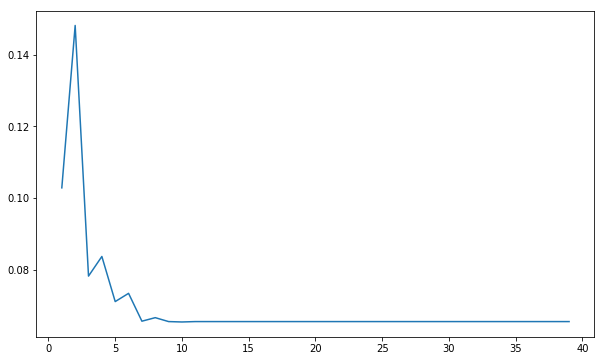

In [27]:
error_rate = []

for i in range(1,40):
    tot = []
    for j in range(1,200):
        Xknn_train,Xknn_test,yknn_train,yknn_test = train_test_split(X,y,test_size=0.3,random_state=j)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xknn_train,yknn_train)
        predknn_i = knn.predict(Xknn_test)
        tot.append(np.mean(predknn_i != yknn_test))
    error_rate.append(np.average(tot))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [28]:
err = []
for i in range(1,200):
    X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X,y,test_size=0.3,random_state=i)
    model_svc = SVC(C= 1, gamma= 0.1)
    model_svc.fit(X_train_svm,y_train_svm)
    pred_svm = model_svc.predict(X_test_svm)
    err.append(np.mean(predknn != yknn_test))
print(np.average(err))
print(confusion_matrix(y_test_svm,pred_svm))
print(classification_report(y_test_svm,pred_svm))

0.0
[[46]]
             precision    recall  f1-score   support

       Next       1.00      1.00      1.00        46

avg / total       1.00      1.00      1.00        46



In [29]:
param_grid = {'C':[0.1,1,0.01,0.05,0.5],'gamma':[1,0.1,0.5,1.5,2]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train_svm,y_train_svm)
print(grid.best_params_)
print(grid.best_estimator_)
grid_pred = grid.predict(X_test_svm)

print(confusion_matrix(y_test_svm,grid_pred))
print(classification_report(y_test_svm,grid_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.888889 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.914286 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.914286 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.888889 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.914286 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.914286 -   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.5, score=0.914286 -   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ....................... C=0.1, gamma=0.5, score=0.914286 -   0.0s
[CV] C=0.1, gamma=1.5 ................................................
[CV] ....................... C=0.1, gamma=1.5, score=0.888889 -   0.0s
[CV] C=0.1, gamma=1.5 ................................................
[CV] ....................... C=0.1, gamma=1.5, score=0.914286 -   0.0s
[CV] C=0.1, gamma=1.5 ................................................
[CV] ....................... C=0.1, gamma=1.5, score=0.914286 -   0.0s
[CV] C=0.1, gamma=2 ..................................................
[CV] ......................... C=0.1, gamma=2, score=0.888889 -   0.0s
[CV] C=0.1, gamma=2 ..................................................
[CV] ......................... C=0.1, gamma=2, score=0.914286 -   0.0s
[CV] C=0.1, gamma=2 ..................................................
[CV] .

[CV] C=0.5, gamma=0.5 ................................................
[CV] ....................... C=0.5, gamma=0.5, score=0.914286 -   0.0s
[CV] C=0.5, gamma=1.5 ................................................
[CV] ....................... C=0.5, gamma=1.5, score=0.888889 -   0.0s
[CV] C=0.5, gamma=1.5 ................................................
[CV] ....................... C=0.5, gamma=1.5, score=0.914286 -   0.0s
[CV] C=0.5, gamma=1.5 ................................................
[CV] ....................... C=0.5, gamma=1.5, score=0.914286 -   0.0s
[CV] C=0.5, gamma=2 ..................................................
[CV] ......................... C=0.5, gamma=2, score=0.888889 -   0.0s
[CV] C=0.5, gamma=2 ..................................................
[CV] ......................... C=0.5, gamma=2, score=0.914286 -   0.0s
[CV] C=0.5, gamma=2 ..................................................
[CV] ......................... C=0.5, gamma=2, score=0.914286 -   0.0s
{'C': 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


In [30]:
group_pred_18 = df_18.copy()
group_pred_18[['agg_score_friend','agg_score_other','agg_score_wcup','Form']].head()

,agg_score_friend,agg_score_other,agg_score_wcup,Form
Russia - 2018,2,12,0,0
Egypt - 2018,10,11,7,0
Morocco - 2018,30,17,12,4
Portugal - 2018,20,16,28,2
France - 2018,31,8,12,3


In [31]:
scaler = StandardScaler()
group_pred_18[['agg_score_friend','agg_score_other','agg_score_wcup','Form']] = scaler.fit_transform(group_pred_18[['agg_score_friend','agg_score_other','agg_score_wcup','Form']])
group_pred_18.head()

,Frie_winrat,other_winrat,Wcup_winrat,goals_ag_fr,goals_ag_other,goals_ag_wcup,goals_for_friend,goals_for_other,goals_for_wcup,agg_score_friend,agg_score_other,agg_score_wcup,Form
Russia - 2018,0.333333,0.437500,0.000,1.481481,0.875000,0.000,1.555556,1.625000,0.000,-0.839743,0.049185,-1.461719,-1.745743
Egypt - 2018,0.555556,0.529412,0.625,0.611111,0.647059,0.625,1.166667,1.294118,1.500,-0.034596,-0.063238,-0.856497,-1.745743
Morocco - 2018,0.652174,0.588235,0.500,0.565217,0.588235,0.125,1.869565,1.588235,1.625,1.978271,0.611298,-0.424196,1.745743
Portugal - 2018,0.500000,0.650000,0.900,0.863636,0.650000,0.400,1.772727,1.450000,3.200,0.971837,0.498876,0.959169,0.000000
France - 2018,0.656250,0.714286,0.700,1.062500,0.714286,0.600,2.031250,1.857143,1.800,2.078914,-0.400506,-0.424196,0.872872


In [32]:
teams18 = list(group_pred_18.index)

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X,y)
pred =logmodel.predict(group_pred_18)
for i in range(len(pred)):
    print(i,pred[i],teams18[i])

0 Next Russia - 2018
1 Next Egypt - 2018
2 Next Morocco - 2018
3 Next Portugal - 2018
4 Next France - 2018
5 Next Argentina - 2018
6 Next Peru - 2018
7 Next Croatia - 2018
8 Next Costa Rica - 2018
9 Next Germany - 2018
10 Next Brazil - 2018
11 Next Sweden - 2018
12 Next Belgium - 2018
13 Next Tunisia - 2018
14 Next Colombia - 2018
15 Next Poland - 2018
16 Next Uruguay - 2018
17 Next Iran - 2018
18 Next Denmark - 2018
19 Next Nigeria - 2018
20 Next Serbia - 2018
21 Next Korea Republic - 2018
22 Next England - 2018
23 Next Japan - 2018
24 Next Saudi Arabia - 2018
25 Next Spain - 2018
26 Next Australia - 2018
27 Next Iceland - 2018
28 Next Mexico - 2018
29 Next Switzerland - 2018
30 Next Senegal - 2018
31 Next Panama - 2018


In [34]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X,y)
predknn =knn.predict(group_pred_18)
for i in range(len(predknn)):
    print(i,predknn[i],teams18[i])

0 Next Russia - 2018
1 Next Egypt - 2018
2 Next Morocco - 2018
3 Next Portugal - 2018
4 Next France - 2018
5 Next Argentina - 2018
6 Next Peru - 2018
7 Next Croatia - 2018
8 Next Costa Rica - 2018
9 Next Germany - 2018
10 Next Brazil - 2018
11 Next Sweden - 2018
12 Next Belgium - 2018
13 Next Tunisia - 2018
14 Next Colombia - 2018
15 Next Poland - 2018
16 Next Uruguay - 2018
17 Next Iran - 2018
18 Next Denmark - 2018
19 Next Nigeria - 2018
20 Next Serbia - 2018
21 Next Korea Republic - 2018
22 Next England - 2018
23 Next Japan - 2018
24 Next Saudi Arabia - 2018
25 Next Spain - 2018
26 Next Australia - 2018
27 Next Iceland - 2018
28 Next Mexico - 2018
29 Next Switzerland - 2018
30 Next Senegal - 2018
31 Next Panama - 2018


In [35]:
model_svc = SVC(C= 1, gamma= 0.5)
model_svc.fit(X,y)
pred_svm = model_svc.predict(group_pred_18)
for i in range(len(pred_svm)):
    print(i,pred_svm[i],teams18[i])

0 Next Russia - 2018
1 Next Egypt - 2018
2 Next Morocco - 2018
3 Next Portugal - 2018
4 Next France - 2018
5 Next Argentina - 2018
6 Next Peru - 2018
7 Next Croatia - 2018
8 Next Costa Rica - 2018
9 Next Germany - 2018
10 Next Brazil - 2018
11 Next Sweden - 2018
12 Next Belgium - 2018
13 Next Tunisia - 2018
14 Next Colombia - 2018
15 Next Poland - 2018
16 Next Uruguay - 2018
17 Next Iran - 2018
18 Next Denmark - 2018
19 Next Nigeria - 2018
20 Next Serbia - 2018
21 Next Korea Republic - 2018
22 Next England - 2018
23 Next Japan - 2018
24 Next Saudi Arabia - 2018
25 Next Spain - 2018
26 Next Australia - 2018
27 Next Iceland - 2018
28 Next Mexico - 2018
29 Next Switzerland - 2018
30 Next Senegal - 2018
31 Next Panama - 2018
